In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

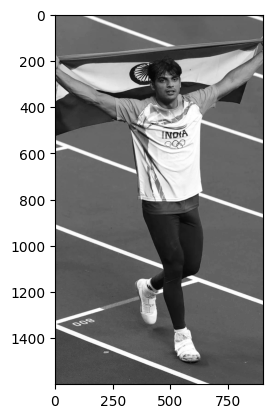

In [2]:
images="./Image Dataset/"
img=cv2.imread("./Image Dataset/Neeraj Chopra/10 facts about Neeraj Chopra_ the.jpg")
img_gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray,cmap='gray')

In [3]:
face_cascade=cv2.CascadeClassifier('./haar-cascade-files-master/haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('./haar-cascade-files-master/haarcascade_eye.xml')
faces=face_cascade.detectMultiScale(img_gray,scaleFactor=1.05,minNeighbors=5)
faces

array([[433, 235, 127, 127]], dtype=int32)

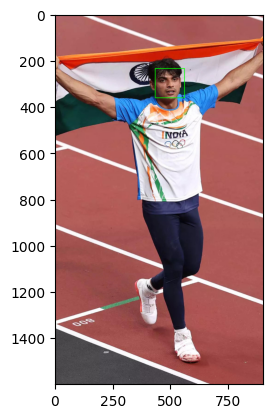

In [4]:
x,y,w,h=faces[0]
face_img=cv2.rectangle(cv2.cvtColor(img,cv2.COLOR_BGR2RGB),(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(face_img)

In [5]:
faces = face_cascade.detectMultiScale(img_gray, 1.3, 5)
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = img_gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

# cv2.imshow('img',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# plt.imshow(cv2.cvtColor(roi_color,cv2.COLOR_BGR2RGB))
eyes

array([[69, 35, 29, 29],
       [19, 42, 27, 27],
       [29, 44, 24, 24]], dtype=int32)

In [6]:
def get_cropped_image(img_path):
    img=cv2.imread(img_path)
    img_gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    faces=face_cascade.detectMultiScale(img_gray,scaleFactor=1.05,minNeighbors=5)
    for(x,y,w,h) in faces:
        roi_gray=img_gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color

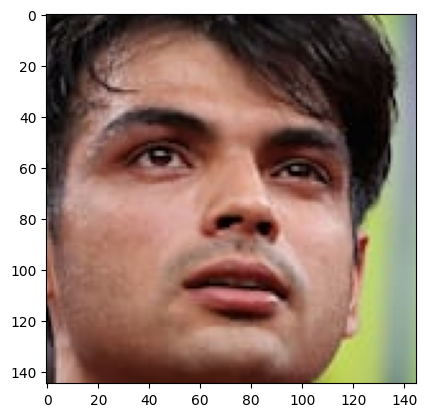

In [7]:
path="./Image Dataset/Neeraj Chopra/Olympic javelin champion Neeraj Chopra.jpg"
img=cv2.imread(path)
# cv2.imshow("img",img)
# cv2.waitKey(0)
# plt.imshow(get_cropped_image(path))
crp_img=get_cropped_image(path)
plt.imshow(cv2.cvtColor(crp_img,cv2.COLOR_BGR2RGB))

In [8]:
path_to_data="./Image Dataset/"
path_to_cr_data="./Image Dataset/cropped/"

In [9]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
        print(os.path.exists(entry.path))

True
True
True
True
True


In [10]:
img_dirs

['./Image Dataset/cropped',
 './Image Dataset/Ravi Kumar Dahiya',
 './Image Dataset/PV Sindhu',
 './Image Dataset/Neeraj Chopra',
 './Image Dataset/Mirabai Chanu']

In [11]:
# #RUN THIS CODE ONLY ONCE
# for dir in img_dirs:
#     l=os.listdir(dir)
#     new_path=path_to_cr_data+dir.split("/")[-1]
#     old_path=path_to_data+dir.split("/")[-1]
#     os.makedirs(new_path)
#     i=1
#     for img in l:
#         a=str(os.path.join(old_path,img))
#         b=f"{os.path.join(new_path,str(i))}.jpg"
#         try:
#             cv2.imwrite(b,get_cropped_image(a))
#             i+=1
#         except:
#             continue

In [12]:
names=[]
for name in img_dirs:
    names.append(name.split("/")[-1])
names

['cropped', 'Ravi Kumar Dahiya', 'PV Sindhu', 'Neeraj Chopra', 'Mirabai Chanu']

In [13]:
path="./Image Dataset/cropped/"
labels={}
l=[]
for folder in os.listdir(path):
    for img in os.listdir(path+"/"+folder):
        l.append(path+"/"+folder+"/"+img)
    labels[folder]=l
    l=[]

Neeraj Chopra


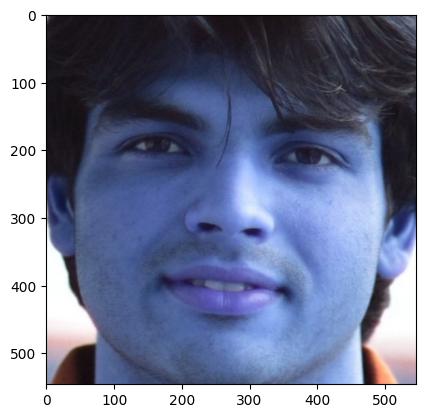

In [14]:
print(list(labels.keys())[2])
plt.imshow(cv2.imread(list(labels.values())[2][0]))

In [15]:
labels

{'Ravi Kumar Dahiya': ['./Image Dataset/cropped//Ravi Kumar Dahiya/23.jpg',
  './Image Dataset/cropped//Ravi Kumar Dahiya/5.jpg',
  './Image Dataset/cropped//Ravi Kumar Dahiya/1.jpg',
  './Image Dataset/cropped//Ravi Kumar Dahiya/14.jpg',
  './Image Dataset/cropped//Ravi Kumar Dahiya/2.jpg',
  './Image Dataset/cropped//Ravi Kumar Dahiya/8.jpg',
  './Image Dataset/cropped//Ravi Kumar Dahiya/16.jpg',
  './Image Dataset/cropped//Ravi Kumar Dahiya/20.jpg',
  './Image Dataset/cropped//Ravi Kumar Dahiya/17.jpg',
  './Image Dataset/cropped//Ravi Kumar Dahiya/13.jpg',
  './Image Dataset/cropped//Ravi Kumar Dahiya/6.jpg',
  './Image Dataset/cropped//Ravi Kumar Dahiya/3.jpg',
  './Image Dataset/cropped//Ravi Kumar Dahiya/11.jpg',
  './Image Dataset/cropped//Ravi Kumar Dahiya/21.jpg',
  './Image Dataset/cropped//Ravi Kumar Dahiya/12.jpg',
  './Image Dataset/cropped//Ravi Kumar Dahiya/15.jpg',
  './Image Dataset/cropped//Ravi Kumar Dahiya/9.jpg',
  './Image Dataset/cropped//Ravi Kumar Dahiya/24.jp

WAVELET TRANSFORM

In [16]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H



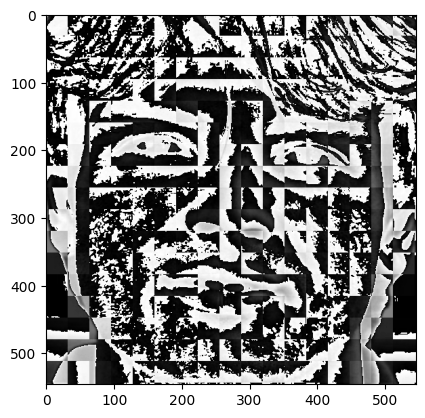

In [17]:
im_har = w2d(cv2.imread(list(labels.values())[2][0]),'db1',5)
plt.imshow(im_har, cmap='gray')

In [18]:
d={}
c=0
for name in labels.keys():
    d[name]=c
    c+=1
d

{'Ravi Kumar Dahiya': 0,
 'PV Sindhu': 1,
 'Neeraj Chopra': 2,
 'Mirabai Chanu': 3}

In [19]:
X=[]
y=[]
for name,images in labels.items():
    for image in images:
        img=cv2.imread(image)
        sc_rw_img=cv2.resize(img,(32,32))
        img_har=w2d(sc_rw_img,'db1',5)
        sc_img_har=cv2.resize(img_har,(32,32))
        combined_img=np.vstack((sc_rw_img.reshape((32*32*3,1)),sc_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(d[name])

In [20]:
X=np.array(X).reshape(len(X),4096).astype(float)

In [21]:
X.shape 

(144, 4096)

In [22]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
# pipe=Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10,gamma='auto'))])
# rf=RandomForestClassifier()
pipe=Pipeline([('scaler',StandardScaler()),('lr',LogisticRegression(max_iter=1000))])
# rf.fit(X_train,y_train)
# rf.score(X_test,y_test)
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.9090909090909091

In [24]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      0.94      0.94        18
           2       0.82      1.00      0.90         9
           3       0.90      0.90      0.90        10

    accuracy                           0.91        44
   macro avg       0.92      0.89      0.89        44
weighted avg       0.92      0.91      0.91        44



In [31]:
model_params={
    'svm':{
        'model':SVC(gamma='auto'),
        'params':{
            'C':[1,10,20],
            'kernel':['rbf','linear']
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[10**i for i in range(1,5)]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(max_iter=1000),
        'params':{
            'C':[1,5,10],
            'penalty':['l1', 'l2', 'elasticnet', 'none']
        }
    },
    'knn':{
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors':[i for i in range(1,10)],
            'metric':['minkowski','euclidean','manhattan'],
            'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
        }
    }
}

In [33]:
import pandas as pd
scores=[]
best_estimators={}
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
for algo,mp in model_params.items():
    clf=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model':algo,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
    best_estimators[algo]=clf.best_estimator_

df=pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

/home/soumik/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/soumik/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/soumik/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/soumik/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/soumik/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/soumik/anaconda3/envs/tf

,model,best_score,best_params
0,svm,0.87,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.85,{'n_estimators': 1000}
2,logistic_regression,0.90,"{'C': 1, 'penalty': 'l2'}"
3,knn,0.86,"{'algorithm': 'auto', 'metric': 'manhattan', '..."


In [35]:
X_test=sc.transform(X_test)
print(best_estimators['svm'].score(X_test,y_test))
print(best_estimators['random_forest'].score(X_test,y_test))
print(best_estimators['logistic_regression'].score(X_test,y_test))
print(best_estimators['knn'].score(X_test,y_test))

0.9090909090909091
0.7954545454545454
0.9090909090909091
0.8181818181818182


In [36]:
print(classification_report(y_test,best_estimators['logistic_regression'].predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      0.94      0.94        18
           2       0.82      1.00      0.90         9
           3       0.90      0.90      0.90        10

    accuracy                           0.91        44
   macro avg       0.92      0.89      0.89        44
weighted avg       0.92      0.91      0.91        44



Text(95.72222222222221, 0.5, 'Truth')

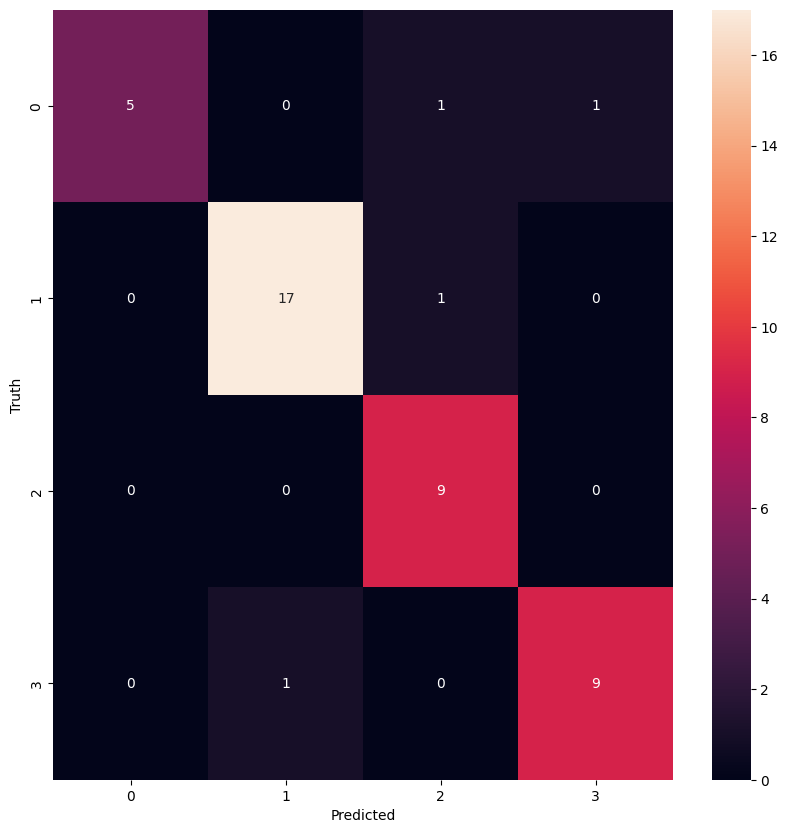

In [40]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test,best_estimators['logistic_regression'].predict(X_test)),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
import pickle
with open('model_pickle','wb') as f:
    pickle.dump(best_estimators['logistic_regression'],f)
with open('names','wb') as f:
    pickle.dump(d,f)